In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Read the dataset iris from sklearn.datasets (iris data as an example)
iris = datasets.load_iris()
iris.data.shape

# Exploratory data analysis (EDA)
# Construct a DataFrame from iris dataset
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns = iris.feature_names)
print(df.head())

# Visualization
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s = 150, marker = 'D')

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# Read the voting data from UCI

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

col_names = ['party',
 'infants',
 'water',
 'budget',
 'physician',
 'salvador',
 'religious',
 'satellite',
 'aid',
 'missile',
 'immigration',
 'synfuels',
 'education',
 'superfund',
 'crime',
 'duty_free_exports',
 'eaa_rsa']

df = pd.read_csv(url, header = None, names = col_names)

# Replace n,y,? in the dataset and fill nas

df = df.replace({'n':0, 'y':1, '?':np.nan}).fillna(method = 'ffill').fillna(method = 'bfill')

# Change the data type to int64

df.iloc[:,1:] = df.iloc[:,1:].astype(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(16), object(1)
memory usage: 57.9+ KB


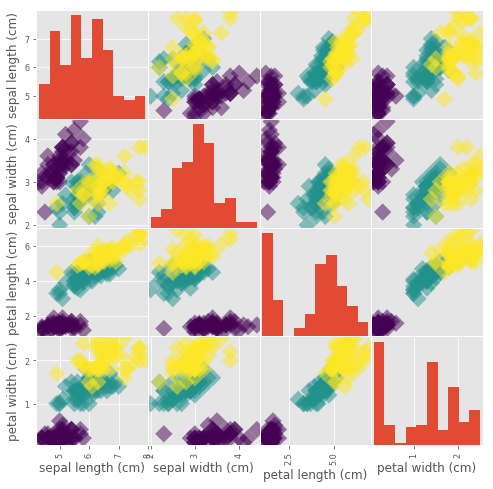

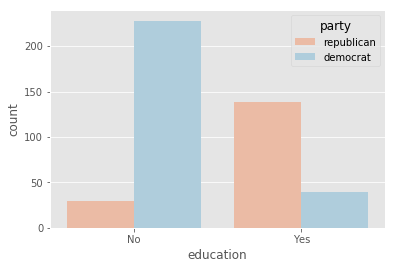

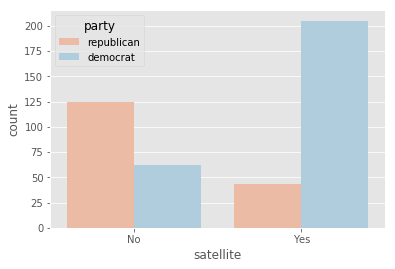

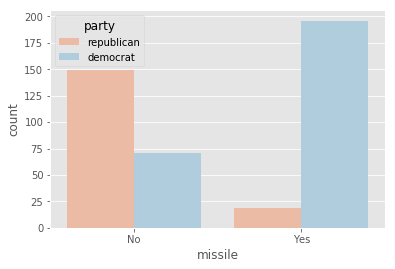

In [4]:
# EDA

plt.figure()
sns.countplot(x = 'education', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes'])


plt.figure()
sns.countplot(x = 'satellite', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes'])


plt.figure()
sns.countplot(x = 'missile', hue = 'party', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No', 'Yes'])


plt.show()

In [5]:
# K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

# Prepare the input data (must be array or series)

y = df['party'].values                    # target
X = df.drop ('party',axis = 1).values     # features (without target of course)

# Construct the model
knn = KNeighborsClassifier(n_neighbors = 6)   # Use 6 neighbors to vote the new one
knn.fit(X, y)                                 # Train the model

# Prediction
y_pred = knn.predict(X)                       # Use X (training data) to predict

# Create a test set
X_new = pd.DataFrame ([[ 0.1963459 ,  0.45884164,  0.71361685,  0.69082501,  0.89980163,
         0.78291888,  0.35866902,  0.35519799,  0.02725219,  0.24324773,
         0.08903189,  0.88828757,  0.32630737,  0.70080398,  0.9124351 ,
         0.39928097]])

new_prediction = knn.predict(X_new)

print("Prediction: {}".format(new_prediction))


Prediction: ['republican']


In [25]:
# Measuring model performance

# Load the dataset
digits = datasets.load_digits()


(1797, 64)
()


(1797, 64)
(1797, 8, 8)


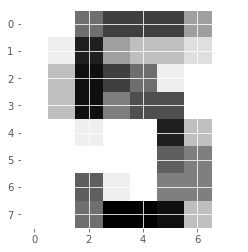

In [35]:
# EDA
print(digits.data.shape)       # This is image data flat version
print(digits.images.shape)     # This is image data original version

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [40]:
# Train/Test Split + Fit/Predict/Accuracy
# Import packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data          # Use this flat version
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

# create and fit the k-NN model
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

# Compute the accuracy of the prediction
knn.score(X_test, y_test)


0.98333333333333328

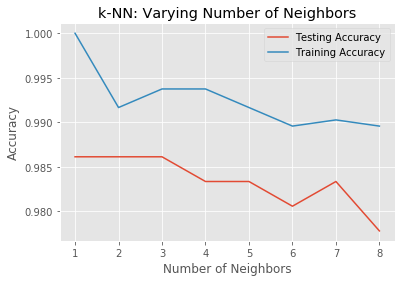

In [42]:
# Overfitting and underfitting
# Setup arrays to store train and test accuracies

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # setup k-NN Classifire with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()